# FACTOR ANALYSIS ASSIGNMENT
## CLIENT 1: Mobile phone copmany 
### MARISSA MCKEE ADTA 5120

You have been hired as a consultant by three clients to perform several analyses. Complete the brief reports to the client in a concise professional manner. It is suggested that you also include an appendix for your supervisor with the relevant SPSS output outlining your findings and analysis. Your supervisor will also like to see the SPSS *.spv file showing your executed SPSS analysis.

#### Client #1:  Mobile Phone Company Customer Segmentation (34 points)

A mobile phone company wants to determine the different types (clusters) of customers is has based on their attitudes of service (aka segmentation). In the file mobi.sav, they asked 250 customers to rate the company based 24 different satisfaction criteria on a scale of 1-10 (10 being the best). 

Compile a report for the senior manager outlining your analysis and findings.

- Run a separate k-means trying 4, 5, 6 and 7 clusters/groups to determine what is the best "group clustering" for this data. In other words, how many distinct customer groups do you have?

- Also, give a name to the types of customers that are in that group (like "not happy, too expensive" or "extremely happy customer," "somewhat happy, but has network issues.")


In [1]:
import pandas as pd
import pyreadstat
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [2]:
# Read mobi.sav 
df, meta = pyreadstat.read_sav("mobi.sav")
df.head()

,QualityExp,MeetNeedsExp,GoWrongExp,OverallSat,Fulfilled,IsIdeal,ComplaintHandling,BuyAgain,SwitchForPrice,Recommend,...,Innovative,OverallQuality,NetworkQuality,CustomerService,ServiceQuality,RangeProdServ,Reliability,ClearInfo,FairPrice,GoodValue
0,7.0,7.0,6.0,6.0,4.0,7.0,7.0,6.0,5.0,6.0,...,4.0,7.0,6.0,4.0,7.0,6.0,5.0,5.0,2.0,3.0
1,10.0,10.0,9.0,10.0,10.0,8.0,10.0,10.0,2.0,10.0,...,9.0,10.0,9.0,10.0,10.0,9.0,10.0,10.0,10.0,10.0
2,7.0,7.0,7.0,8.0,7.0,7.0,6.0,6.0,2.0,7.0,...,7.0,7.0,8.0,5.0,7.0,8.0,7.0,7.0,7.0,7.0
3,7.0,10.0,5.0,10.0,10.0,10.0,5.0,10.0,4.0,10.0,...,10.0,8.0,10.0,10.0,8.0,4.0,5.0,8.0,5.0,5.0
4,8.0,7.0,10.0,10.0,8.0,8.0,5.0,10.0,3.0,8.0,...,9.0,10.0,9.0,8.0,10.0,9.0,9.0,8.0,6.0,6.0


In [3]:
# View the features in the dataframe
df.columns

Index(['QualityExp', 'MeetNeedsExp', 'GoWrongExp', 'OverallSat', 'Fulfilled',
       'IsIdeal', 'ComplaintHandling', 'BuyAgain', 'SwitchForPrice',
       'Recommend', 'Trusted', 'Stable', 'Responsible', 'Concerned',
       'Innovative', 'OverallQuality', 'NetworkQuality', 'CustomerService',
       'ServiceQuality', 'RangeProdServ', 'Reliability', 'ClearInfo',
       'FairPrice', 'GoodValue'],
      dtype='object')

In [4]:
# Check for nulls
df.isnull().any()

QualityExp           False
MeetNeedsExp         False
GoWrongExp           False
OverallSat           False
Fulfilled            False
IsIdeal              False
ComplaintHandling    False
BuyAgain             False
SwitchForPrice       False
Recommend            False
Trusted              False
Stable               False
Responsible          False
Concerned            False
Innovative           False
OverallQuality       False
NetworkQuality       False
CustomerService      False
ServiceQuality       False
RangeProdServ        False
Reliability          False
ClearInfo            False
FairPrice            False
GoodValue            False
dtype: bool

In [5]:
# Drop rows with missing values
df.dropna(inplace=True)

In [6]:
# Sanity check 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 24 columns):
QualityExp           250 non-null float64
MeetNeedsExp         250 non-null float64
GoWrongExp           250 non-null float64
OverallSat           250 non-null float64
Fulfilled            250 non-null float64
IsIdeal              250 non-null float64
ComplaintHandling    250 non-null float64
BuyAgain             250 non-null float64
SwitchForPrice       250 non-null float64
Recommend            250 non-null float64
Trusted              250 non-null float64
Stable               250 non-null float64
Responsible          250 non-null float64
Concerned            250 non-null float64
Innovative           250 non-null float64
OverallQuality       250 non-null float64
NetworkQuality       250 non-null float64
CustomerService      250 non-null float64
ServiceQuality       250 non-null float64
RangeProdServ        250 non-null float64
Reliability          250 non-null float64
ClearInfo    

In [7]:
# View output 
df.head()

,QualityExp,MeetNeedsExp,GoWrongExp,OverallSat,Fulfilled,IsIdeal,ComplaintHandling,BuyAgain,SwitchForPrice,Recommend,...,Innovative,OverallQuality,NetworkQuality,CustomerService,ServiceQuality,RangeProdServ,Reliability,ClearInfo,FairPrice,GoodValue
0,7.0,7.0,6.0,6.0,4.0,7.0,7.0,6.0,5.0,6.0,...,4.0,7.0,6.0,4.0,7.0,6.0,5.0,5.0,2.0,3.0
1,10.0,10.0,9.0,10.0,10.0,8.0,10.0,10.0,2.0,10.0,...,9.0,10.0,9.0,10.0,10.0,9.0,10.0,10.0,10.0,10.0
2,7.0,7.0,7.0,8.0,7.0,7.0,6.0,6.0,2.0,7.0,...,7.0,7.0,8.0,5.0,7.0,8.0,7.0,7.0,7.0,7.0
3,7.0,10.0,5.0,10.0,10.0,10.0,5.0,10.0,4.0,10.0,...,10.0,8.0,10.0,10.0,8.0,4.0,5.0,8.0,5.0,5.0
4,8.0,7.0,10.0,10.0,8.0,8.0,5.0,10.0,3.0,8.0,...,9.0,10.0,9.0,8.0,10.0,9.0,9.0,8.0,6.0,6.0


In [8]:
# Bartletts test: checks for intercorrelation among variables
chi_square_value,p_value=calculate_bartlett_sphericity(df)
print('Chi square value:',chi_square_value)
print('P value:',p_value)

Chi square value: 2891.687667337282
P value: 0.0


In [9]:
# Kaiser (KMO) test: measures the adequacy of the data for factor analysis
kmo_all,kmo_model=calculate_kmo(df)
print('KMO:',kmo_model)

KMO: 0.9226429581666507


In [10]:
# Create factor analysis object to perform factor analysis 
fa = FactorAnalyzer(5, rotation="varimax")
fa.fit(df)

# Eigen values 
eigen, vectors = fa.get_eigenvalues()
print('Eigen:',eigen)

Eigen: [9.47520072 1.59547745 1.21880943 1.09172294 1.05043264 0.94947055
 0.86802207 0.80439918 0.73932617 0.7187391  0.65761817 0.57956821
 0.53727432 0.50201249 0.43543063 0.41624265 0.39257983 0.36367102
 0.34687508 0.29700619 0.28294552 0.26059587 0.22204988 0.19452991]


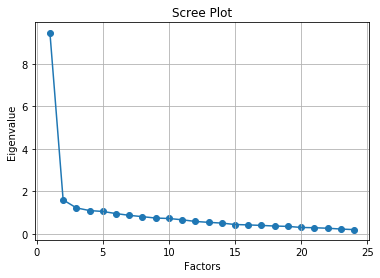

In [11]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),eigen)
plt.plot(range(1,df.shape[1]+1),eigen)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [12]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(6, rotation="varimax")
fa.fit(df)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=6, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [13]:
loadings=fa.loadings_
print(loadings)

[[ 0.14383848  0.33361173  0.1822889   0.07885913  0.19742725  0.17926418]
 [ 0.15241318  0.44635865 -0.00082913  0.1743275   0.11423748  0.05666488]
 [ 0.09953182  0.07784499  0.14064208  0.03577372  0.6253612   0.06177073]
 [ 0.35063157  0.32839018  0.1023743   0.32025075  0.39995382  0.23334497]
 [ 0.51436601  0.25340808  0.24749908  0.25326267  0.25566567  0.08343916]
 [ 0.60413958  0.18378399  0.32976923  0.43715691  0.11499928  0.11111065]
 [ 0.61448345  0.17368743  0.1204137   0.21039531  0.01725738  0.02793878]
 [ 0.0958634   0.3113963   0.26088624  0.50142392  0.05942774  0.07168342]
 [ 0.09843779  0.0818929   0.11393484  0.04328466  0.04378821 -0.23134054]
 [ 0.33388992  0.22348591  0.20193433  0.70962514  0.11980986  0.10125396]
 [ 0.45608352  0.29893831  0.14451852  0.15117273  0.19289745  0.16169061]
 [ 0.15211982  0.22812924  0.10337748  0.14450359  0.30348624  0.51751762]
 [ 0.16541601  0.41568582  0.25084082  0.11034095  0.07525215 -0.10533729]
 [ 0.38837603  0.43600059

In [14]:
# Get variance of each factors
fa.get_factor_variance()

(array([3.51439639, 2.57560271, 1.96304645, 1.598354  , 1.45292706,
        1.41449444]),
 array([0.14643318, 0.10731678, 0.0817936 , 0.06659808, 0.06053863,
        0.05893727]),
 array([0.14643318, 0.25374996, 0.33554356, 0.40214165, 0.46268028,
        0.52161754]))

In [15]:
# Display 6 factors
pd.DataFrame.from_records(loadings)

,0,1,2,3,4,5
0,0.143838,0.333612,0.182289,0.078859,0.197427,0.179264
1,0.152413,0.446359,-0.000829,0.174327,0.114237,0.056665
2,0.099532,0.077845,0.140642,0.035774,0.625361,0.061771
3,0.350632,0.328390,0.102374,0.320251,0.399954,0.233345
4,0.514366,0.253408,0.247499,0.253263,0.255666,0.083439
5,0.604140,0.183784,0.329769,0.437157,0.114999,0.111111
6,0.614483,0.173687,0.120414,0.210395,0.017257,0.027939
7,0.095863,0.311396,0.260886,0.501424,0.059428,0.071683
8,0.098438,0.081893,0.113935,0.043285,0.043788,-0.231341
9,0.333890,0.223486,0.201934,0.709625,0.119810,0.101254
